In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Credit Score.csv")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(164, 8)
   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Incom

In [4]:
print(df["Credit Score"].value_counts())

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


In [5]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [6]:
# Convert Male/Female to 1/0
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [7]:
#tot chech whether the male and female changed into 1 and 0
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    int64 
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(4), object(4)
memory usage: 10.4+ KB
None
   Age  Gender  Income            Education Marital Status  \
0   25       0   50000    Bachelor's Degree         Single   
1   30       1  100000      Master's Degree        Married   
2   35       0   75000            Doctorate        Married   
3   40       1  125000  High School Diploma         Single   
4   45       0  100000    Bachelor's Degree       

In [8]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=["Education", "Marital Status", "Home Ownership"], drop_first=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale selected numerical columns
df[["Age", "Income", "Number of Children"]] = scaler.fit_transform(df[["Age", "Income", "Number of Children"]])

In [10]:
print(df["Credit Score"].value_counts())


Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


In [11]:
print(df.describe())

              Age      Gender      Income  Number of Children
count  164.000000  164.000000  164.000000          164.000000
mean     0.463415    0.475610    0.427384            0.217480
std      0.302760    0.500934    0.236053            0.294449
min      0.000000    0.000000    0.000000            0.000000
25%      0.205357    0.000000    0.236364            0.000000
50%      0.428571    0.000000    0.427273            0.000000
75%      0.714286    1.000000    0.581818            0.333333
max      1.000000    1.000000    1.000000            1.000000


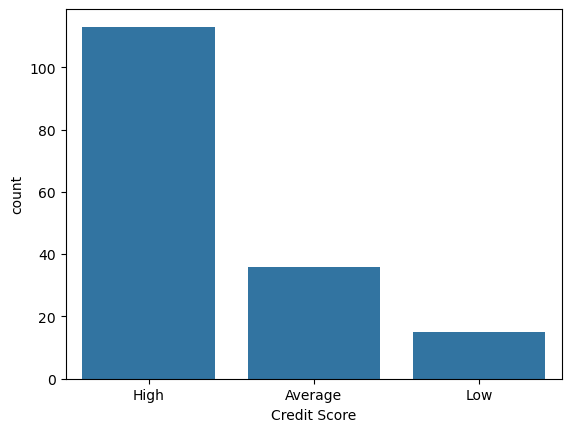

In [12]:
sns.countplot(x="Credit Score", data=df)
plt.show()

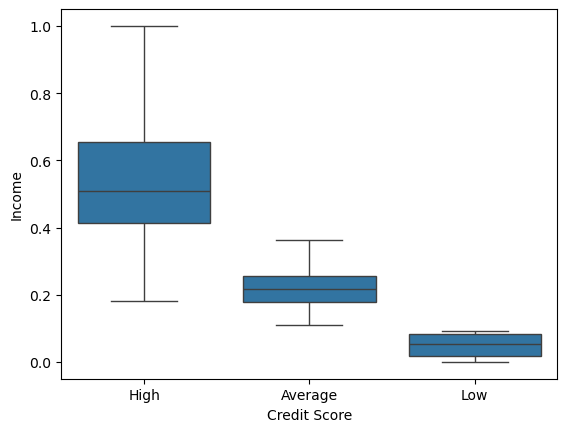

In [13]:
sns.boxplot(x="Credit Score", y="Income", data=df)
plt.show()

In [14]:
df_raw = pd.read_csv("Credit Score.csv")   # for EDA graphs
df_clean = df_raw.copy()                # for cleaning + ML

In [15]:
print(df.columns)

Index(['Age', 'Gender', 'Income', 'Number of Children', 'Credit Score',
       'Education_Bachelor's Degree', 'Education_Doctorate',
       'Education_High School Diploma', 'Education_Master's Degree',
       'Marital Status_Single', 'Home Ownership_Rented'],
      dtype='object')


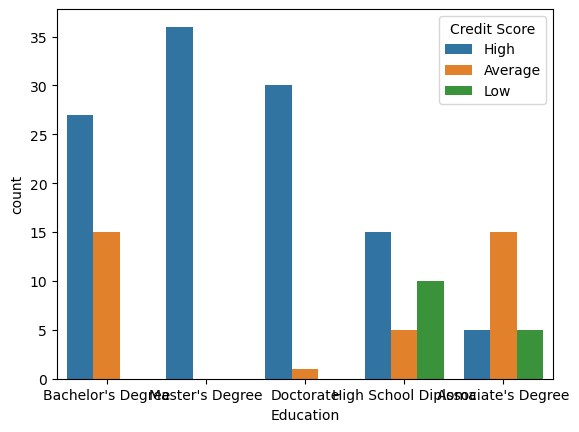

In [16]:
sns.countplot(x="Education", hue="Credit Score", data=df_raw)
plt.show()

In [17]:
y = df_clean["Credit Score"]

In [18]:
X = df_clean.drop("Credit Score", axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
df_clean["Gender"] = df_clean["Gender"].map({"Male": 1, "Female": 0})

In [22]:
X = df_clean.drop("Credit Score", axis=1)
y = df_clean["Credit Score"]

In [23]:
print(df_clean.columns)
print(df_clean.dtypes)

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')
Age                    int64
Gender                 int64
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object


In [24]:
# One-hot encode ALL categorical columns at once
df_clean = pd.get_dummies(df, drop_first=True)

# Make sure target variable (Credit Score) is numeric
df_clean["Credit Score"] = df["Credit Score"].map({"Good": 1, "Bad": 0})

In [25]:
print(df_clean.dtypes)

Age                              float64
Gender                             int64
Income                           float64
Number of Children               float64
Education_Bachelor's Degree         bool
Education_Doctorate                 bool
Education_High School Diploma       bool
Education_Master's Degree           bool
Marital Status_Single               bool
Home Ownership_Rented               bool
Credit Score_High                   bool
Credit Score_Low                    bool
Credit Score                     float64
dtype: object


In [26]:
print(df["Credit Score"].unique())

['High' 'Average' 'Low']


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean["Credit Score"] = le.fit_transform(df_clean["Credit Score"])


In [28]:
print(df_clean["Credit Score"].unique())  # should show [0,1,2]
print(df_clean["Credit Score"].isnull().sum())  # should show 0

[0]
0


In [29]:
print(df_clean["Credit Score"].value_counts())

Credit Score
0    164
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("Credit Score", axis=1)
y = df_clean["Credit Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


In [31]:
df_raw = pd.read_csv("Credit Score.csv")  # or your original file
print(df_raw["Credit Score"].unique())

['High' 'Average' 'Low']


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean["Credit Score"] = le.fit_transform(df_raw["Credit Score"])
print(df_clean["Credit Score"].value_counts())

Credit Score
1    113
0     36
2     15
Name: count, dtype: int64


In [33]:
#Load original dataset
df_raw = pd.read_csv("Credit Score.csv")

In [34]:
# 3️⃣ Encode target variable (Credit Score)
le = LabelEncoder()
df_raw["Credit Score Encoded"] = le.fit_transform(df_raw["Credit Score"])

In [35]:
# Check mapping
print("Credit Score mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df_raw["Credit Score Encoded"].value_counts())

Credit Score mapping: {'Average': np.int64(0), 'High': np.int64(1), 'Low': np.int64(2)}
Credit Score Encoded
1    113
0     36
2     15
Name: count, dtype: int64


In [36]:
# 4️⃣ Encode categorical features using one-hot encoding
categorical_cols = ["Education", "Marital Status", "Home Ownership"]
df_clean = pd.get_dummies(df_raw, columns=categorical_cols, drop_first=True)

In [37]:
# Include numeric columns
numeric_cols = ["Age", "Gender", "Income", "Number of Children"]

In [38]:
# Prepare features and target
X = df_clean[numeric_cols + [col for col in df_clean.columns if col.startswith(tuple(categorical_cols))]]
y = df_clean["Credit Score Encoded"]

In [39]:
# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [40]:
X_train["Gender"] = X_train["Gender"].map({"Male": 1, "Female": 0})
X_test["Gender"] = X_test["Gender"].map({"Male": 1, "Female": 0})

In [41]:
bool_cols = X_train.select_dtypes('bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

In [42]:
print(X_train.dtypes)

Age                              int64
Gender                           int64
Income                           int64
Number of Children               int64
Education_Bachelor's Degree      int64
Education_Doctorate              int64
Education_High School Diploma    int64
Education_Master's Degree        int64
Marital Status_Single            int64
Home Ownership_Rented            int64
dtype: object


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf = rf.predict(X_test_scaled)

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9411764705882353

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         1

    accuracy                           0.94        17
   macro avg       0.97      0.92      0.94        17
weighted avg       0.95      0.94      0.94        17


Confusion Matrix:
 [[ 3  1  0]
 [ 0 12  0]
 [ 0  0  1]]


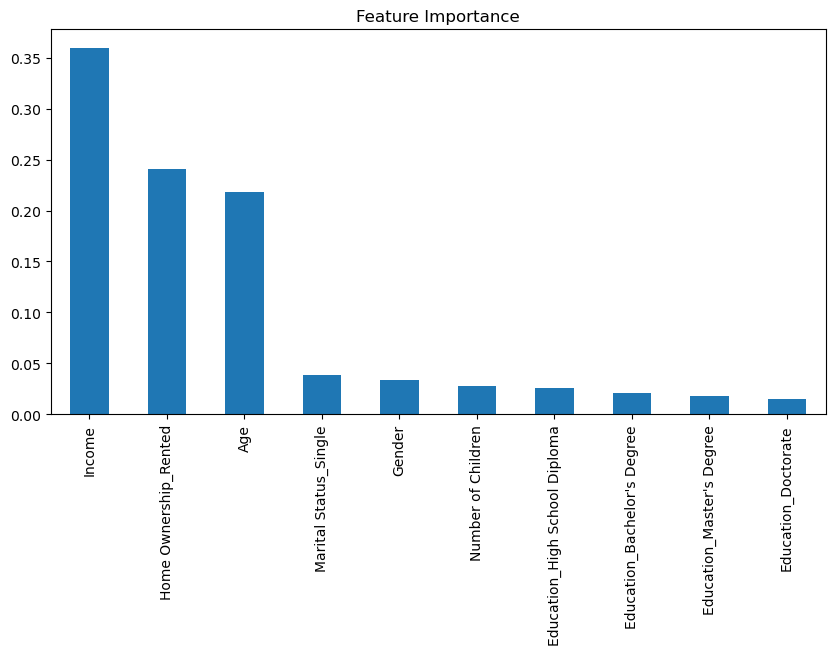

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()
